# 03_04 VAE Digits Analysis

**Chapter 3**: Variational Autoencoders | **Notebook 4 of 6**

Analyzes the trained VAE model:
- Reconstruction quality visualization
- Latent space exploration
- Digit generation from latent samples

## Imports

In [1]:
import tensorflow as tf

# ═══════════════════════════════════════════════════════════════════════════════
# GPU MEMORY CONFIGURATION
# ═══════════════════════════════════════════════════════════════════════════════
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"GPU(s) available: {[gpu.name for gpu in gpus]}")
else:
    print("WARNING: No GPU detected, running on CPU")

2026-01-04 08:01:59.073472: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cataluna84/Workspace-Antigravity/Generative_Deep_Learning/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


GPU(s) available: ['/physical_device:GPU:0']


In [2]:
# ═══════════════════════════════════════════════════════════════════════════════
# IMPORTS
# ═══════════════════════════════════════════════════════════════════════════════

# Standard library
import os
import sys

# Path setup for local imports
sys.path.insert(0, '../..')
sys.path.insert(0, '..')

# Third-party
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Local imports
from src.models.VAE import VariationalAutoencoder
from src.utils.loaders import load_mnist, load_model

In [3]:
# ═══════════════════════════════════════════════════════════════════════════════
# GLOBAL CONFIGURATION
# ═══════════════════════════════════════════════════════════════════════════════

SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = f'../run/{SECTION}/{RUN_ID}_{DATA_NAME}'

print(f"Run folder: {RUN_FOLDER}")

Run folder: ../run/vae/0002_digits


## Load Data

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = load_mnist()
print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

Training samples: 60000, Test samples: 10000


## Load Model

In [5]:
# Load pre-trained VAE model
vae = load_model(VariationalAutoencoder, RUN_FOLDER)
print(f"Model loaded from: {RUN_FOLDER}")

I0000 00:00:1767513728.648886    1444 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6094 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


Model loaded from: ../run/vae/0002_digits


## Reconstruction Visualization

2026-01-04 08:02:11.943684: I external/local_xla/xla/service/service.cc:163] XLA service 0x7d2444003a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-04 08:02:11.943758: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2026-01-04 08:02:11.975191: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-04 08:02:12.050463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701
2026-01-04 08:02:12.985892: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[10,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_targe

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1767513734.484786    8896 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


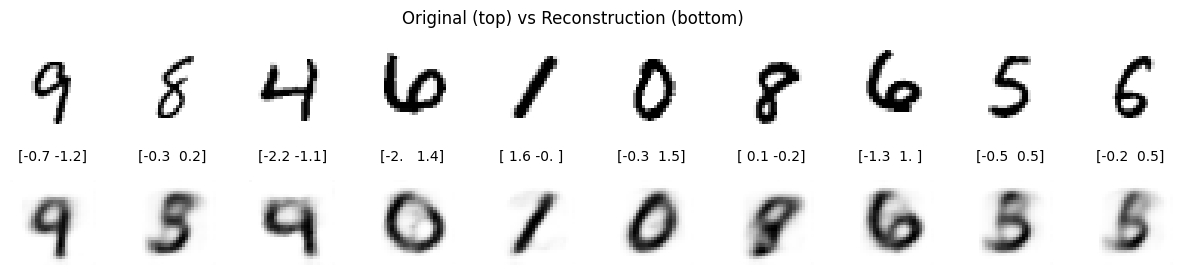

In [6]:
# ═══════════════════════════════════════════════════════════════════════════════
# RECONSTRUCTION VISUALIZATION
# ═══════════════════════════════════════════════════════════════════════════════
# Encode test images to latent space, then decode to visualize reconstruction.

n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

# Encode to latent space
z_points = vae.encoder.predict(example_images)

# Decode back to image space
reconst_images = vae.decoder.predict(z_points)

# Plot original (top row) and reconstruction (bottom row)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i], 1)),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i + n_to_show + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

plt.suptitle('Original (top) vs Reconstruction (bottom)')
plt.show()

## Latent Space Visualization

2026-01-04 08:02:17.250587: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2026-01-04 08:02:17.548158: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$c

149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

2026-01-04 08:02:20.053565: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[8,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


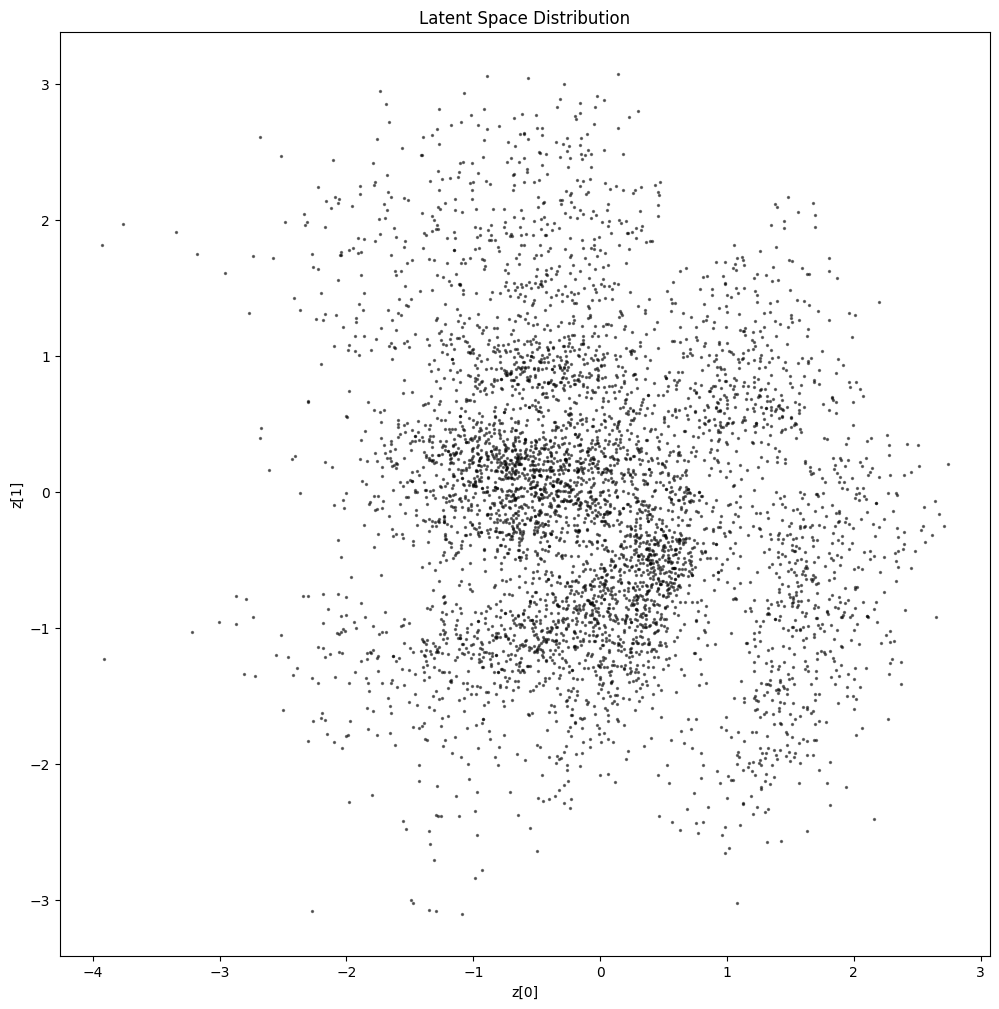

In [7]:
# ═══════════════════════════════════════════════════════════════════════════════
# LATENT SPACE SCATTER PLOT
# ═══════════════════════════════════════════════════════════════════════════════
# Visualize distribution of test images in 2D latent space.

n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to latent space
z_points = vae.encoder.predict(example_images)

# Store bounds for later use
min_x, max_x = min(z_points[:, 0]), max(z_points[:, 0])
min_y, max_y = min(z_points[:, 1]), max(z_points[:, 1])

# Plot latent distribution
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)
plt.xlabel('z[0]')
plt.ylabel('z[1]')
plt.title('Latent Space Distribution')
plt.show()

## Generated Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


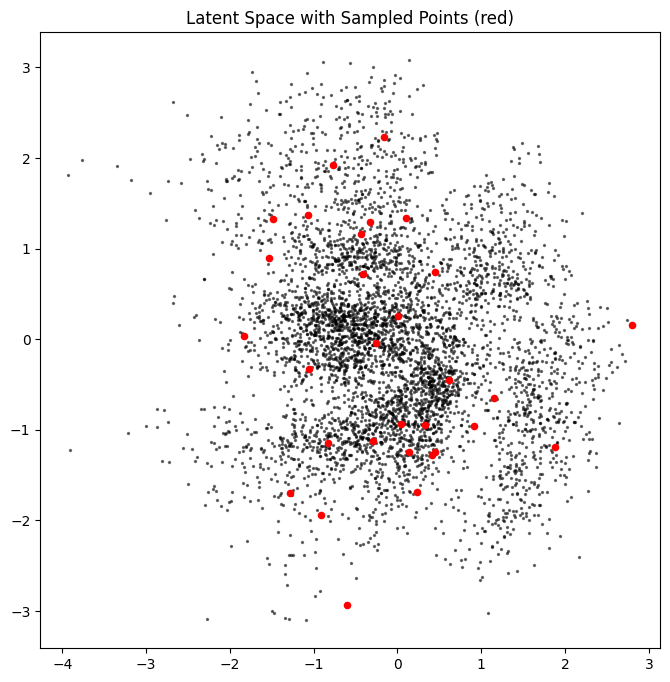

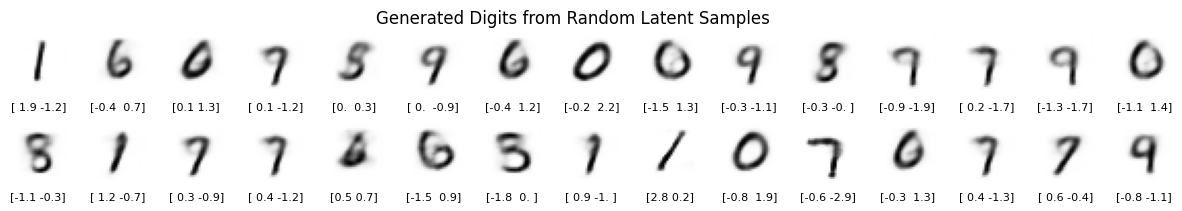

In [8]:
# ═══════════════════════════════════════════════════════════════════════════════
# RANDOM SAMPLE GENERATION
# ═══════════════════════════════════════════════════════════════════════════════
# Sample random points from N(0,1) and decode to generate new digits.

figsize = 8
grid_size = 15
grid_depth = 2

# Show latent distribution with sampled points
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)

# Sample from standard normal (the VAE prior)
x = np.random.normal(size=grid_size * grid_depth)
y = np.random.normal(size=grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))

# Generate images from latent samples
reconst = vae.decoder.predict(z_grid)

# Plot sampled points in red
plt.scatter(z_grid[:, 0], z_grid[:, 1], c='red', alpha=1, s=20)
plt.title('Latent Space with Sampled Points (red)')
plt.show()

# Display generated images
fig = plt.figure(figsize=(15, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size * grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i], 1)),
            fontsize=8, ha='center', transform=ax.transAxes)
    ax.imshow(reconst[i, :, :, 0], cmap='Greys')

plt.suptitle('Generated Digits from Random Latent Samples')
plt.show()

## Colored Latent Space by Digit

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


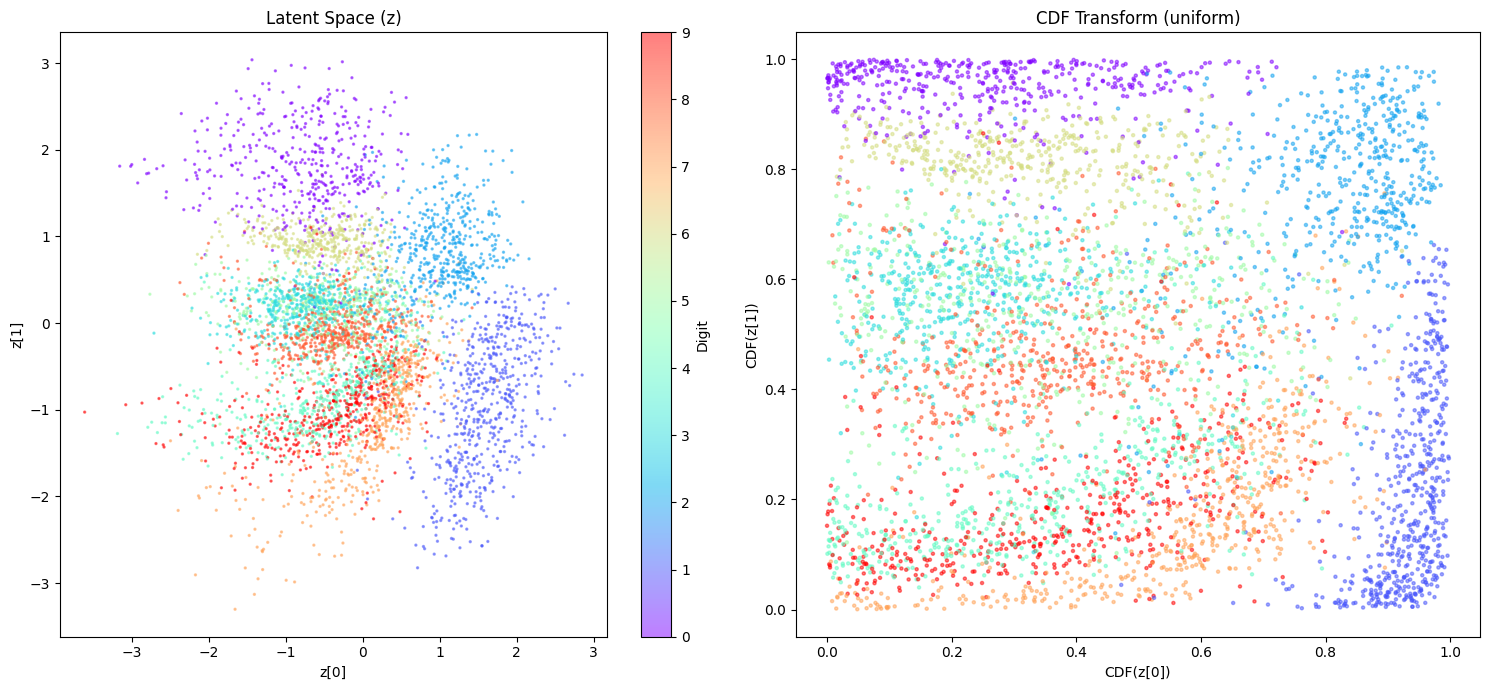

In [9]:
# ═══════════════════════════════════════════════════════════════════════════════
# COLORED LATENT SPACE BY DIGIT LABEL
# ═══════════════════════════════════════════════════════════════════════════════
# Color-code latent space by digit class to visualize clustering.
# Also show CDF transform for comparison.

n_to_show = 5000
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to latent space
z_points = vae.encoder.predict(example_images)

# CDF transform (maps to uniform [0,1])
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

# Left: Original latent space (colored by digit)
ax = fig.add_subplot(1, 2, 1)
scatter1 = ax.scatter(z_points[:, 0], z_points[:, 1],
                      cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar(scatter1, ax=ax, label='Digit')
ax.set_title('Latent Space (z)')
ax.set_xlabel('z[0]')
ax.set_ylabel('z[1]')

# Right: CDF-transformed space
ax = fig.add_subplot(1, 2, 2)
scatter2 = ax.scatter(p_points[:, 0], p_points[:, 1],
                      cmap='rainbow', c=example_labels, alpha=0.5, s=5)
ax.set_title('CDF Transform (uniform)')
ax.set_xlabel('CDF(z[0])')
ax.set_ylabel('CDF(z[1])')

plt.tight_layout()
plt.show()

## Digit Manifold (Latent Space Grid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


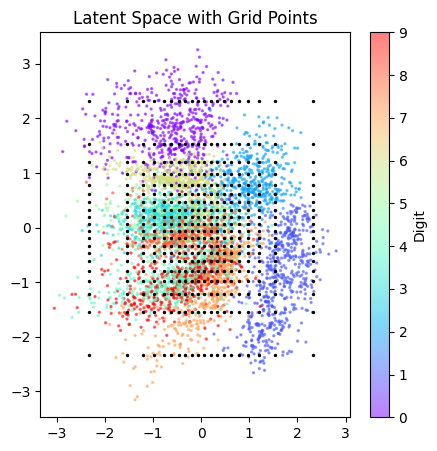

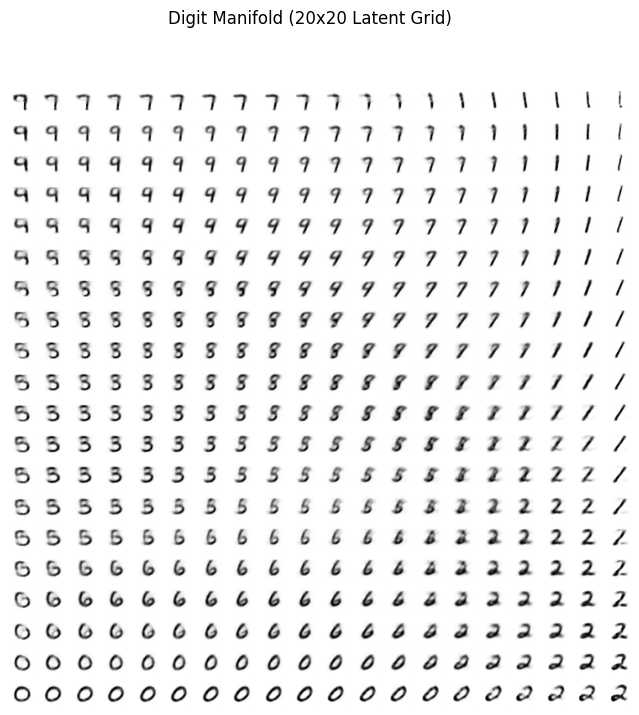

In [10]:
# ═══════════════════════════════════════════════════════════════════════════════
# DIGIT MANIFOLD (LATENT SPACE GRID)
# ═══════════════════════════════════════════════════════════════════════════════
# Generate a grid of images by sampling uniformly across latent space.
# Uses PPF (percent point function / inverse CDF) to map [0.01, 0.99] to z-space.

n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to get latent distribution
z_points = vae.encoder.predict(example_images)

# Show latent scatter colored by digit
plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0], z_points[:, 1],
            cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar(label='Digit')

# Create grid in latent space using inverse CDF (PPF)
# Maps uniform [0.01, 0.99] to normally distributed z values
x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
z_grid = np.array(list(zip(xv.flatten(), yv.flatten())))

# Decode grid to generate digit manifold
reconst = vae.decoder.predict(z_grid)

# Overlay grid points
plt.scatter(z_grid[:, 0], z_grid[:, 1], c='black', alpha=1, s=2)
plt.title('Latent Space with Grid Points')
plt.show()

# Display digit manifold (20x20 grid)
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size ** 2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis('off')
    ax.imshow(reconst[i, :, :, 0], cmap='Greys')

plt.suptitle('Digit Manifold (20x20 Latent Grid)')
plt.show()

## Cleanup: Restart Kernel to Release GPU Memory

In [11]:
# ═══════════════════════════════════════════════════════════════════════════════
# CLEANUP: Restart kernel to fully release GPU memory
# ═══════════════════════════════════════════════════════════════════════════════
# TensorFlow/CUDA does not release GPU memory within a running Python process.
# Restarting the kernel is the only guaranteed way to free all GPU resources.
# Run this cell only after all work is complete and saved.

# import IPython
# print("Restarting kernel to release GPU memory...")
# IPython.Application.instance().kernel.do_shutdown(restart=True)